# HNSCC

First we import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from umap import UMAP
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN

Then we load the CSV file

In [2]:
all_data = pd.read_table('./HNSCC_all_data.txt', header=None, low_memory=False)

# data contains only the expression levels
data = pd.DataFrame(all_data.values[6:,1:], columns=all_data.values[0, 1:], dtype=np.float32)
# here we transpose the matrix so that we have the genes on the columns and the cells on the rows
data = data.T

## Pre-processing

In [5]:
# here we normalize the data both in-samples and between samples
data_normalized = normalize(data)

### Dimensionality reduction with UMAP

Since our data has to many columns(genes) to be plot and clustered we perform dimensionality reduction on it

In [6]:
reducer = UMAP(
    random_state=47,
)
trans = reducer.fit_transform(data_normalized) # it's a numpy.ndarray
trans.shape # (5902, 2)

(5902, 2)

Text(0.5, 1.0, 'UMAP applied on HNSCC')

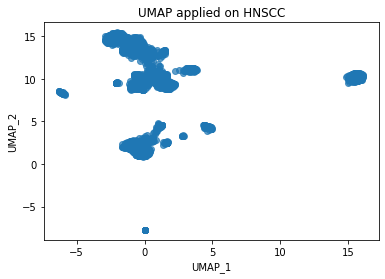

In [7]:
plt.scatter(
    trans[:, 0], # first column as X
    trans[:, 1], # second column as Y
    alpha=.7
)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.title("UMAP applied on HNSCC")

## Clustering

We are going to use DBSCAN to find the clusters

In [8]:
db = DBSCAN().fit(trans)

In [ ]:
plt.scatter(
    trans[:, 0],
    trans[:, 1],
    alpha=.7,
    c=db.labels_
)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.colorbar()
plt.title("Clustering with DBSCANN");

### Find most expressed genes in a cluster

In [10]:
gene_names = all_data.values[6:,0]
gene_names

array(["'C9orf152'", "'RPS11'", "'ELMO2'", ..., "'SLC39A6'", "'CTSC'",
       "'AQP7'"], dtype=object)

Here we change the content of the data with the normalized values

In [28]:
data[:] = data_normalized

##### Find the most expressed genes in the cells of that cluster

In [27]:
for cluster_id in set(db.labels_):
    # get the cells of that cluster
    label_n = data.loc[db.labels_ == cluster_id, :]

    # get the total expression of the genes and sort the results
    sorted_genes = label_n.sum(axis=0).sort_values() / label_n.shape[0]
    
    # print the most expressed genes in this cluster
    print("Most expressed genes for cluster number:", cluster_id)
    print(sorted_genes.tail())
    print(gene_names[sorted_genes.tail().keys()])
    print("")

Most expressed genes for cluster number: 0
5797     0.040514
20342    0.041886
12256    0.042590
11140    0.045928
514      0.048568
dtype: float32
["'TMSB4X'" "'ACTB'" "'MTRNR2L8'" "'MTRNR2L2'" "'B2M'"]

Most expressed genes for cluster number: 1
26       0.041244
4800     0.043386
22012    0.045943
12256    0.048841
11140    0.054020
dtype: float32
["'RPS18'" "'RPS8'" "'GAPDH'" "'MTRNR2L8'" "'MTRNR2L2'"]

Most expressed genes for cluster number: 2
7719     0.051971
5277     0.052346
11140    0.054362
3701     0.054805
514      0.060216
dtype: float32
["'FTL'" "'HERPUD1'" "'MTRNR2L2'" "'SSR4'" "'B2M'"]

Most expressed genes for cluster number: 3
11140    0.049653
4276     0.049906
13895    0.051500
176      0.051656
22012    0.053559
dtype: float32
["'MTRNR2L2'" "'ACTA1'" "'MYL1'" "'TNNT3'" "'GAPDH'"]

Most expressed genes for cluster number: 4
21092    0.045808
8613     0.047606
20342    0.051102
5797     0.061983
514      0.065591
dtype: float32
["'FTH1'" "'MALAT1'" "'ACTB'" "'TMSB4

##### Find the most expressed genes in the cells of that cluster in relation with the other clusters

In [40]:
total_genes_expressions = data.loc[:, :].sum(axis=0) / data.values.shape[0]
for cluster_id in set(db.labels_):
    # get the cells of that cluster
    label_n = data.loc[db.labels_ == cluster_id, :]
    label_n -= total_genes_expressions
    
    # get the total expression of the genes and sort the results
    sorted_genes = label_n.sum(axis=0).sort_values() / label_n.shape[0]
    
    # print the most expressed genes in this cluster
    print("Most expressed genes for cluster number:", cluster_id)
    print(sorted_genes.tail())
    print(gene_names[sorted_genes.tail().keys()])
    print("")

Most expressed genes for cluster number: 0
19131    0.007477
3164     0.007781
13591    0.008107
10337    0.008237
2267     0.010365
dtype: float32
["'MT2A'" "'SERPING1'" "'IGFBP7'" "'C1R'" "'IFITM3'"]

Most expressed genes for cluster number: 1
3443     0.023702
13941    0.025018
7002     0.028901
9940     0.030535
13435    0.031523
dtype: float32
["'KRT8'" "'UBD'" "'FDCSP'" "'KRT19'" "'CSN3'"]

Most expressed genes for cluster number: 2
3701     0.037896
22146    0.038078
6442     0.041575
8171     0.046316
17927    0.047463
dtype: float32
["'SSR4'" "'DERL3'" "'IGLL5'" "'ELK2AP'" "'MZB1'"]

Most expressed genes for cluster number: 3
22056    0.043534
10784    0.045411
4276     0.049673
176      0.051207
13895    0.051306
dtype: float32
["'CKM'" "'DES'" "'ACTA1'" "'TNNT3'" "'MYL1'"]

Most expressed genes for cluster number: 4
3725     0.023244
3702     0.026127
7963     0.026244
737      0.026373
11823    0.027428
dtype: float32
["'PTPRC'" "'RGS1'" "'SRGN'" "'ARHGDIB'" "'CXCR4'"]

Mos

##### Show the results 

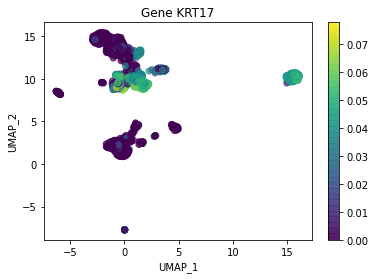

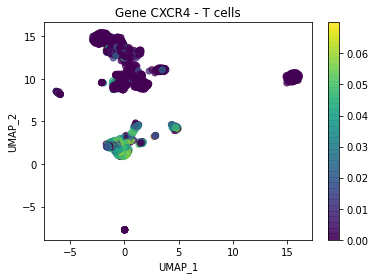

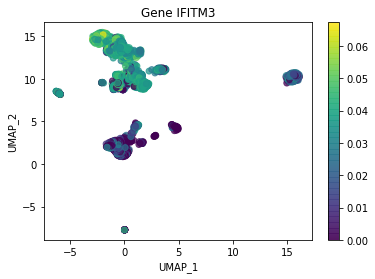

In [44]:
def plot_gene(gene_number, gene_name):
    plt.scatter(
        trans[:, 0],
        trans[:, 1],
        alpha=.7,
        c=data.values[:, gene_number].astype(np.float32)
    )
    plt.xlabel("UMAP_1")
    plt.ylabel("UMAP_2")
    plt.title("Gene " + gene_name);
    plt.colorbar()
    plt.show()

#plot_gene(514, "B2M")
#plot_gene(11140, "MTRNR2L2")
#plot_gene(5797, "TMSB4X")
plot_gene(21035, "KRT17")
plot_gene(11823, "CXCR4 - T cells")
plot_gene(2267, "IFITM3") 

# Cluster 0 = Fibroblasts, Basal cells, EC
# Cluster 1 = Basal cells, Cholangiocytes
# Cluster 2 = Germ cells, T cells, Basal cells, Plasma cells, Dendritic cells
# Cluster 3 = Germ cells, Smooth muscle c., Myoepithelial c.
# Cluster 4 = T cells, Dendritic cells
# Cluster 5 = T cells, Dendritic cells, Erythroid-like, Basal cells
# Cluster 6 = Mast cells
# Cluster 7 = T cells, Germ cells, Erythroid-like, Dendritic cells, Basal cells
# Cluster 8 = Basal cells, Cholangiocytes, Germ cells
# Cluster 9 = Germ cells, Basal cells, T cells, Dendritic cells

# Ground truth

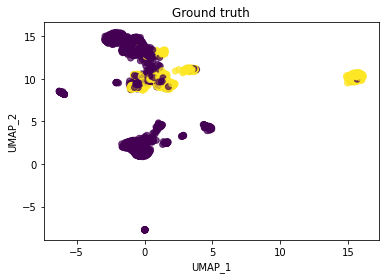

In [65]:
plt.scatter(
    trans[:, 0],
    trans[:, 1],
    alpha=.7,
    c=all_data.values[3, 1:].astype(np.int32)
)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.title("Ground truth");

## Get most expressed genes for cancer and non-cancer cells

In [25]:
# get the cancer cells
label_cancer = all_data.values[3, 1:].astype(np.int32)

def most_expr_genes(is_cancer):
    is_cancer = int(is_cancer)
    cancer_cells = data.iloc[label_cancer == is_cancer, :]

    sorted_cancer_genes = cancer_cells.sum(axis=0).sort_values() / cancer_cells.shape[0]

    # print the most expressed genes in the cancer cells
    if(is_cancer == 1):
        print("Most expressed genes for cancer cells")
    else:
        print("Most expressed genes for non cancer cells")
    print(sorted_cancer_genes.tail(10))
    print(gene_names[sorted_cancer_genes.tail(10).keys()])
    print("")


most_expr_genes(is_cancer=True)
most_expr_genes(is_cancer=False)

Most expressed genes for cancer cells
12256    0.037799
7719     0.037988
20342    0.038186
19983    0.038212
12558    0.038828
22012    0.038877
16635    0.039283
21035    0.040018
514      0.040049
11140    0.040097
dtype: float32
["'MTRNR2L8'" "'FTL'" "'ACTB'" "'KRT14'" "'ANXA2'" "'GAPDH'" "'RPL7'"
 "'KRT17'" "'B2M'" "'MTRNR2L2'"]

Most expressed genes for non cancer cells
3015     0.039673
16635    0.041086
7719     0.041144
8613     0.041943
12256    0.042425
21092    0.042903
20342    0.045601
11140    0.046207
5797     0.050119
514      0.056780
dtype: float32
["'UBB'" "'RPL7'" "'FTL'" "'MALAT1'" "'MTRNR2L8'" "'FTH1'" "'ACTB'"
 "'MTRNR2L2'" "'TMSB4X'" "'B2M'"]

